In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Campus_Selection.csv to Campus_Selection (1).csv


# *Importing* DataSet

In [ ]:
df=pd.read_csv("/content/Campus_Selection.csv")

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


# preprocessing

In [ ]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [ ]:
df['ssc_p'].value_counts()

ssc_p
62.00    11
63.00    10
67.00     9
52.00     9
73.00     9
         ..
69.70     1
80.92     1
83.00     1
86.50     1
80.60     1
Name: count, Length: 103, dtype: int64

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the encoded DataFrame
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [ ]:

from sklearn.preprocessing import PowerTransformer

# Select the numerical features for transformation
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Instantiate the PowerTransformer with the 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the numerical features
df[numerical_features] = pt.fit_transform(df[numerical_features])

df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,-0.049031,1,2.195963,1,1,-1.158230,2,0,-1.399135,1,-0.555854,1
1,2,1,1.121943,0,1.098928,1,2,1.467396,2,1,1.082552,0,0.730818,1
2,3,1,-0.234072,0,0.172464,0,0,-0.284743,0,0,0.320376,0,-0.747234,1
3,4,1,-1.048339,0,-1.333660,0,2,-2.104710,2,0,-0.377919,1,-0.437858,0
4,5,1,1.755811,0,0.678617,0,1,0.951271,0,0,1.671035,0,-1.207551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,1.245356,1,1.420833,1,1,1.481890,0,0,1.349201,0,1.905929,1
211,212,1,-0.870090,1,-0.568493,1,2,0.786096,2,0,0.247735,0,-1.606358,1
212,213,1,-0.049031,1,0.081041,1,1,0.913356,0,1,-1.002376,0,1.249367,1
213,214,0,0.609574,1,-0.010711,1,1,-1.158230,0,0,-0.054693,1,-0.290790,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 23.6 KB


# **ignore the tuples**

In [ ]:
df_1=df.dropna()
df_1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,-0.049031,1,2.195963,1,1,-1.158230,2,0,-1.399135,1,-0.555854,1
1,2,1,1.121943,0,1.098928,1,2,1.467396,2,1,1.082552,0,0.730818,1
2,3,1,-0.234072,0,0.172464,0,0,-0.284743,0,0,0.320376,0,-0.747234,1
3,4,1,-1.048339,0,-1.333660,0,2,-2.104710,2,0,-0.377919,1,-0.437858,0
4,5,1,1.755811,0,0.678617,0,1,0.951271,0,0,1.671035,0,-1.207551,1


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 23.6 KB


In [ ]:
df_10=df.dropna(axis=0,how="any")
df_10

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,-0.049031,1,2.195963,1,1,-1.158230,2,0,-1.399135,1,-0.555854,1
1,2,1,1.121943,0,1.098928,1,2,1.467396,2,1,1.082552,0,0.730818,1
2,3,1,-0.234072,0,0.172464,0,0,-0.284743,0,0,0.320376,0,-0.747234,1
3,4,1,-1.048339,0,-1.333660,0,2,-2.104710,2,0,-0.377919,1,-0.437858,0
4,5,1,1.755811,0,0.678617,0,1,0.951271,0,0,1.671035,0,-1.207551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,1.245356,1,1.420833,1,1,1.481890,0,0,1.349201,0,1.905929,1
211,212,1,-0.870090,1,-0.568493,1,2,0.786096,2,0,0.247735,0,-1.606358,1
212,213,1,-0.049031,1,0.081041,1,1,0.913356,0,1,-1.002376,0,1.249367,1
213,214,0,0.609574,1,-0.010711,1,1,-1.158230,0,0,-0.054693,1,-0.290790,1


In [ ]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 23.6 KB


# **forward fill**

In [ ]:
df_2=df.fillna(0)
df_2

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,-0.049031,1,2.195963,1,1,-1.158230,2,0,-1.399135,1,-0.555854,1
1,2,1,1.121943,0,1.098928,1,2,1.467396,2,1,1.082552,0,0.730818,1
2,3,1,-0.234072,0,0.172464,0,0,-0.284743,0,0,0.320376,0,-0.747234,1
3,4,1,-1.048339,0,-1.333660,0,2,-2.104710,2,0,-0.377919,1,-0.437858,0
4,5,1,1.755811,0,0.678617,0,1,0.951271,0,0,1.671035,0,-1.207551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,1.245356,1,1.420833,1,1,1.481890,0,0,1.349201,0,1.905929,1
211,212,1,-0.870090,1,-0.568493,1,2,0.786096,2,0,0.247735,0,-1.606358,1
212,213,1,-0.049031,1,0.081041,1,1,0.913356,0,1,-1.002376,0,1.249367,1
213,214,0,0.609574,1,-0.010711,1,1,-1.158230,0,0,-0.054693,1,-0.290790,1


# **Backward filling**

In [ ]:
df_3=df.fillna(method="bfill")
df_3

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,-0.049031,1,2.195963,1,1,-1.158230,2,0,-1.399135,1,-0.555854,1
1,2,1,1.121943,0,1.098928,1,2,1.467396,2,1,1.082552,0,0.730818,1
2,3,1,-0.234072,0,0.172464,0,0,-0.284743,0,0,0.320376,0,-0.747234,1
3,4,1,-1.048339,0,-1.333660,0,2,-2.104710,2,0,-0.377919,1,-0.437858,0
4,5,1,1.755811,0,0.678617,0,1,0.951271,0,0,1.671035,0,-1.207551,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,1.245356,1,1.420833,1,1,1.481890,0,0,1.349201,0,1.905929,1
211,212,1,-0.870090,1,-0.568493,1,2,0.786096,2,0,0.247735,0,-1.606358,1
212,213,1,-0.049031,1,0.081041,1,1,0.913356,0,1,-1.002376,0,1.249367,1
213,214,0,0.609574,1,-0.010711,1,1,-1.158230,0,0,-0.054693,1,-0.290790,1


In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

# **HeatMap**

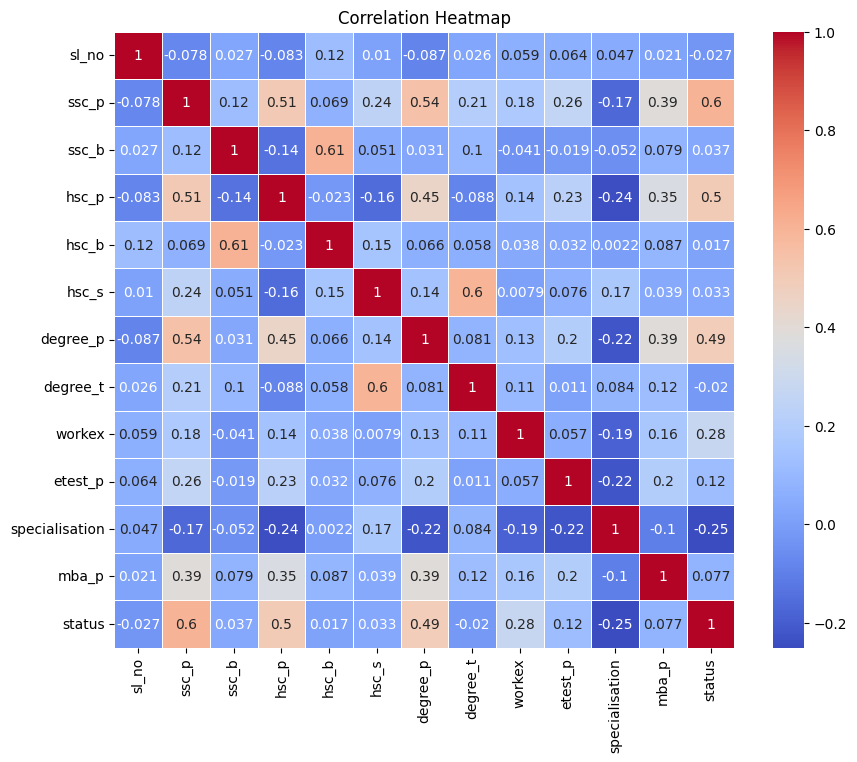

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Specify the target variable and independent variables
target_variable = 'status'  # Replace with the actual target variable name
independent_variables = ['sl_no', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']  # Replace with the actual independent variable names

# Calculate the correlation matrix
correlation_matrix = df[independent_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# **BoxPlot**

<Axes: xlabel='hsc_p'>

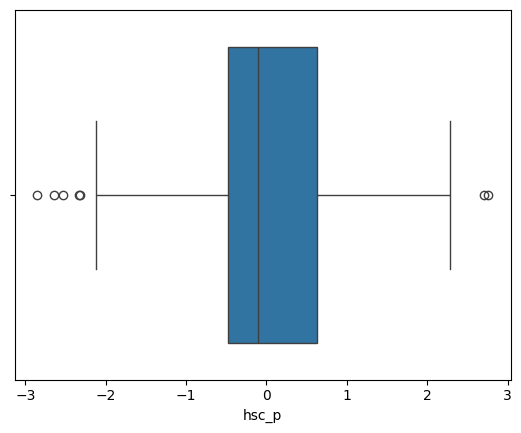

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame and 'hsc_p' is the column you want to plot
sns.boxplot(x=df['hsc_p'])


# **scatterplot**

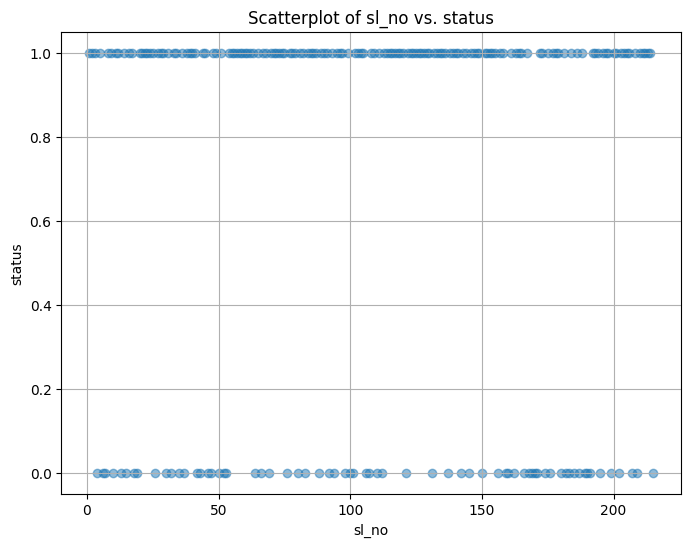

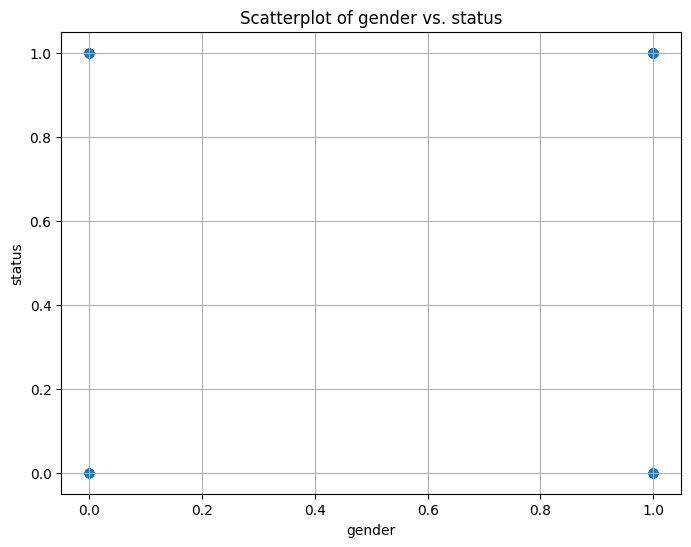

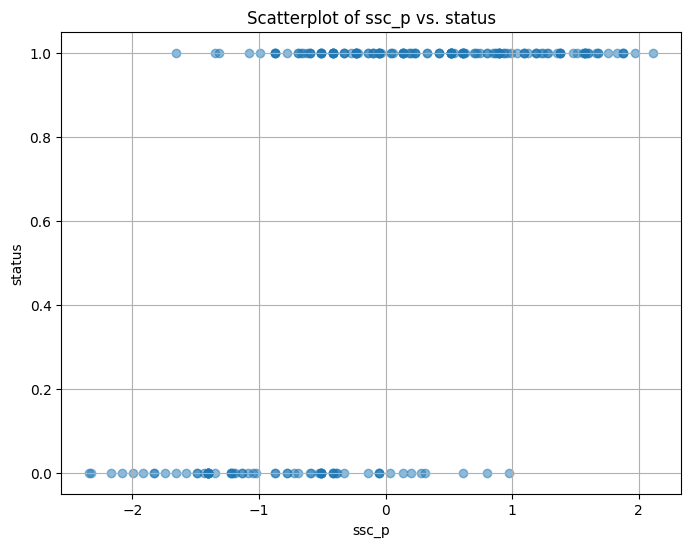

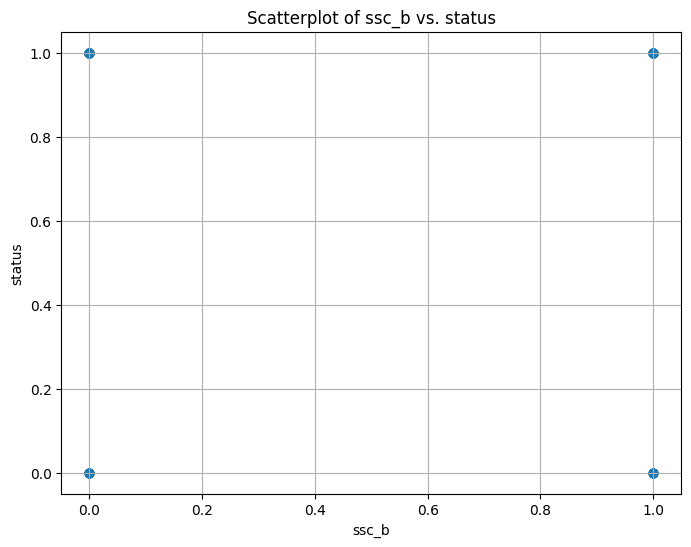

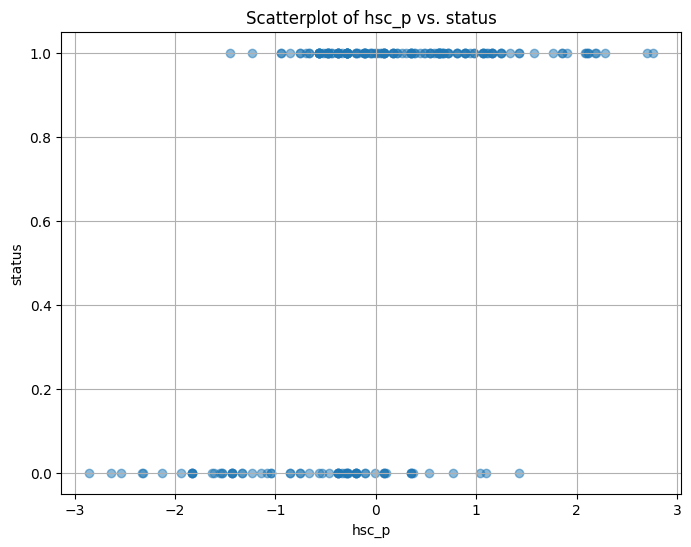

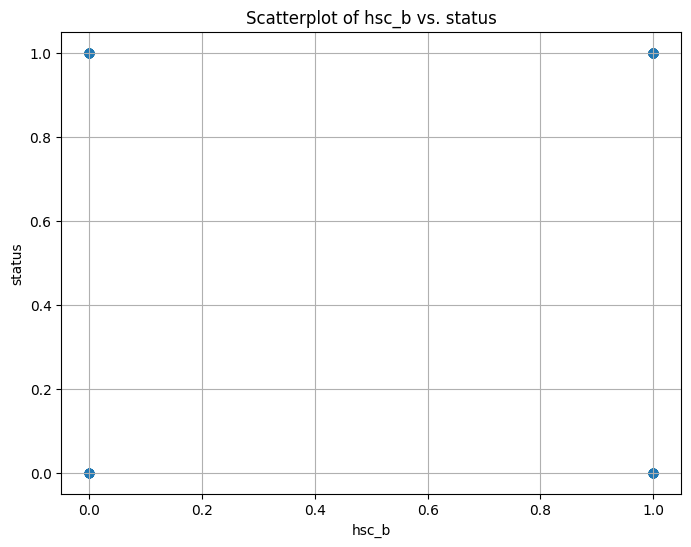

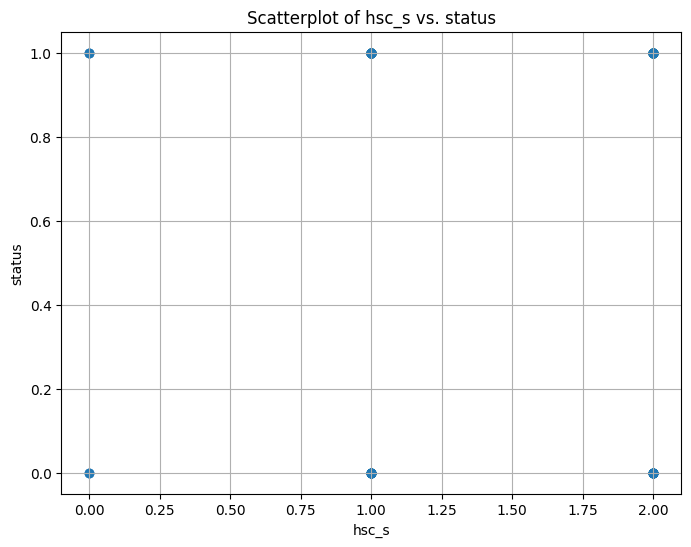

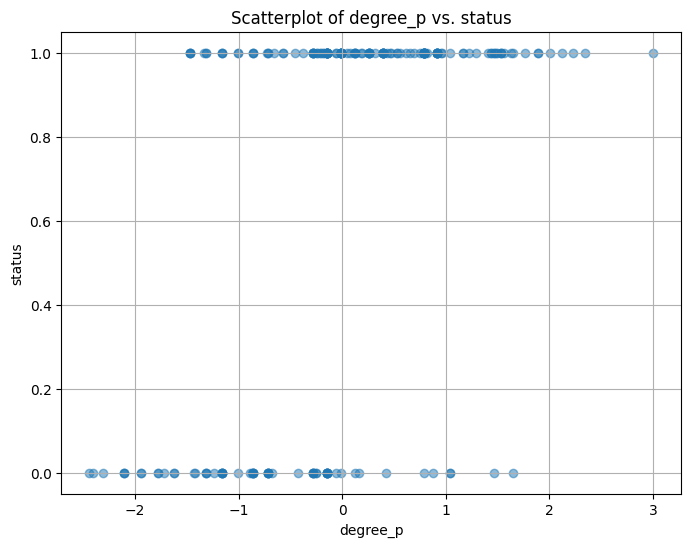

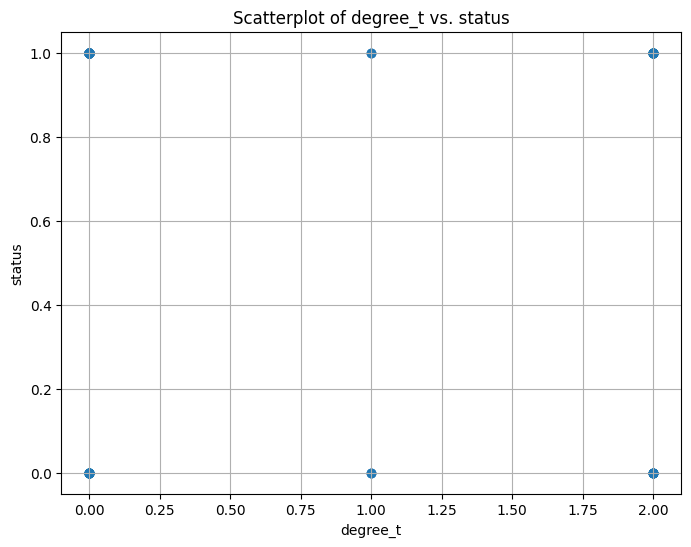

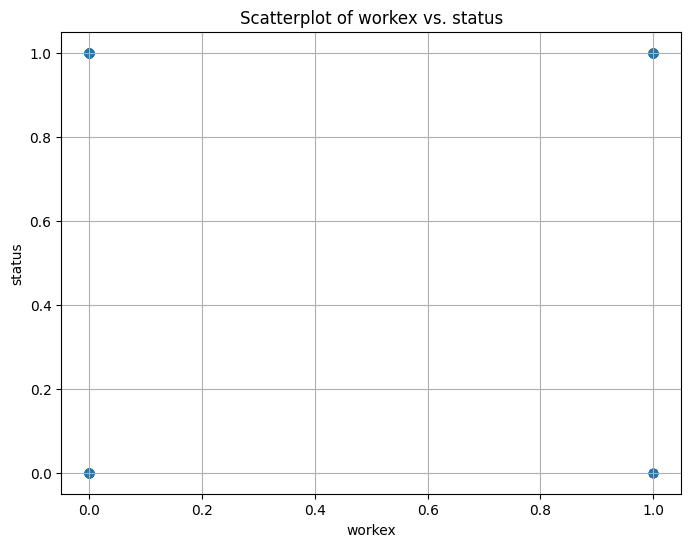

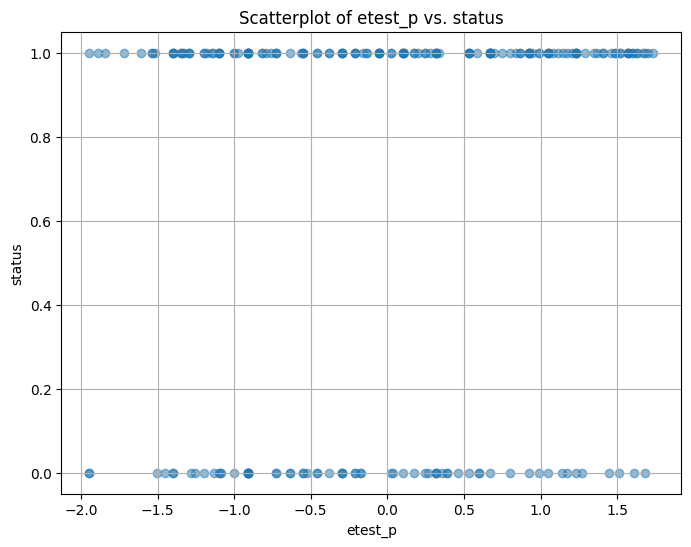

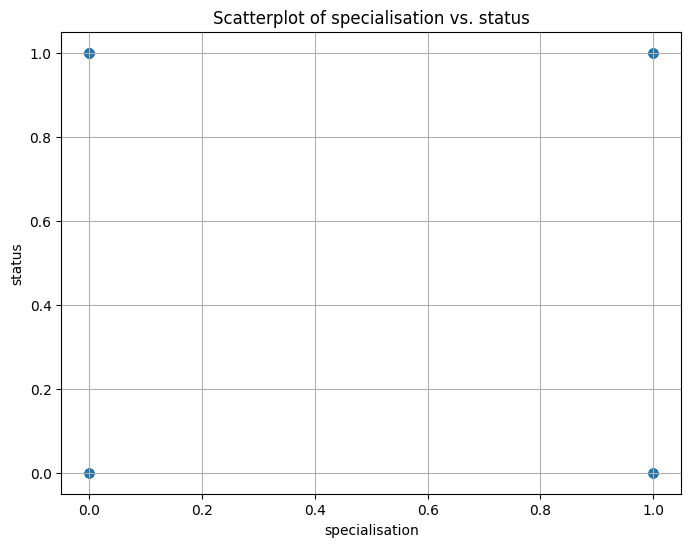

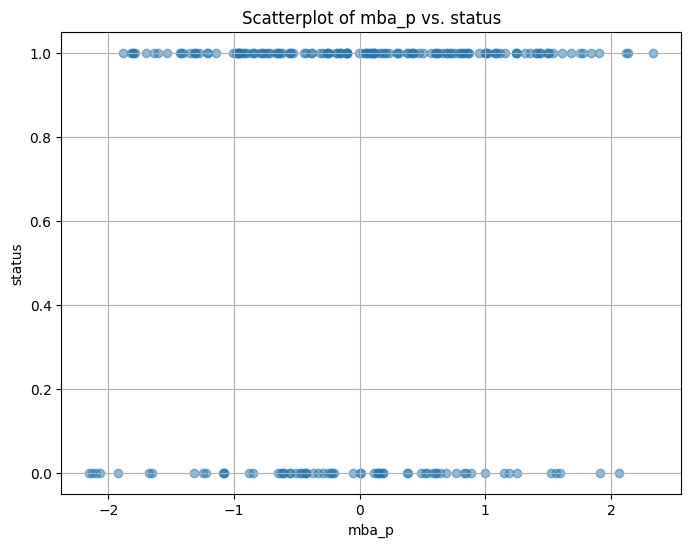

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame (replace 'your_dataset.csv' with your actual dataset file)


# Specify the target variable and independent variables
target_variable = 'status'  # Replace with the actual target variable name
independent_variables = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']  # Replace with the actual independent variable names

# Create scatterplots for each independent variable
for independent_var in independent_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[independent_var], df[target_variable], alpha=0.5)
    plt.xlabel(independent_var)
    plt.ylabel(target_variable)
    plt.title(f'Scatterplot of {independent_var} vs. {target_variable}')
    plt.grid(True)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 23.6 KB


In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

# **Histogram**

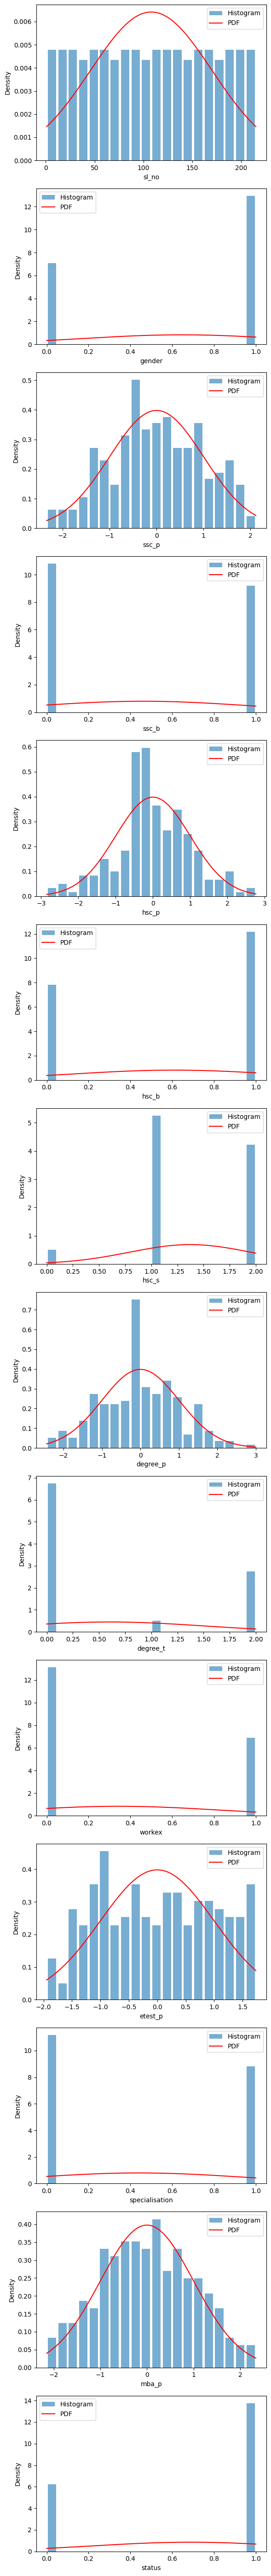

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# List of variables to plot
variables_to_plot = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']

# Create a new figure
fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(6, 4 * len(variables_to_plot)))

# Iterate through the list of variables
for i, variable in enumerate(variables_to_plot):
    # Plot histogram with bars
    axs[i].hist(df[variable], bins=20, rwidth=0.8, density=True, alpha=0.6, label='Histogram')

    # Plot PDF of normal distribution without creating a dense array
    x_range = np.linspace(df[variable].min(), df[variable].max(), 1000)
    axs[i].plot(x_range, norm.pdf(x_range, df[variable].mean(), df[variable].std()), 'r-', label='PDF')

    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Density')
    axs[i].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# **BoxPlot**

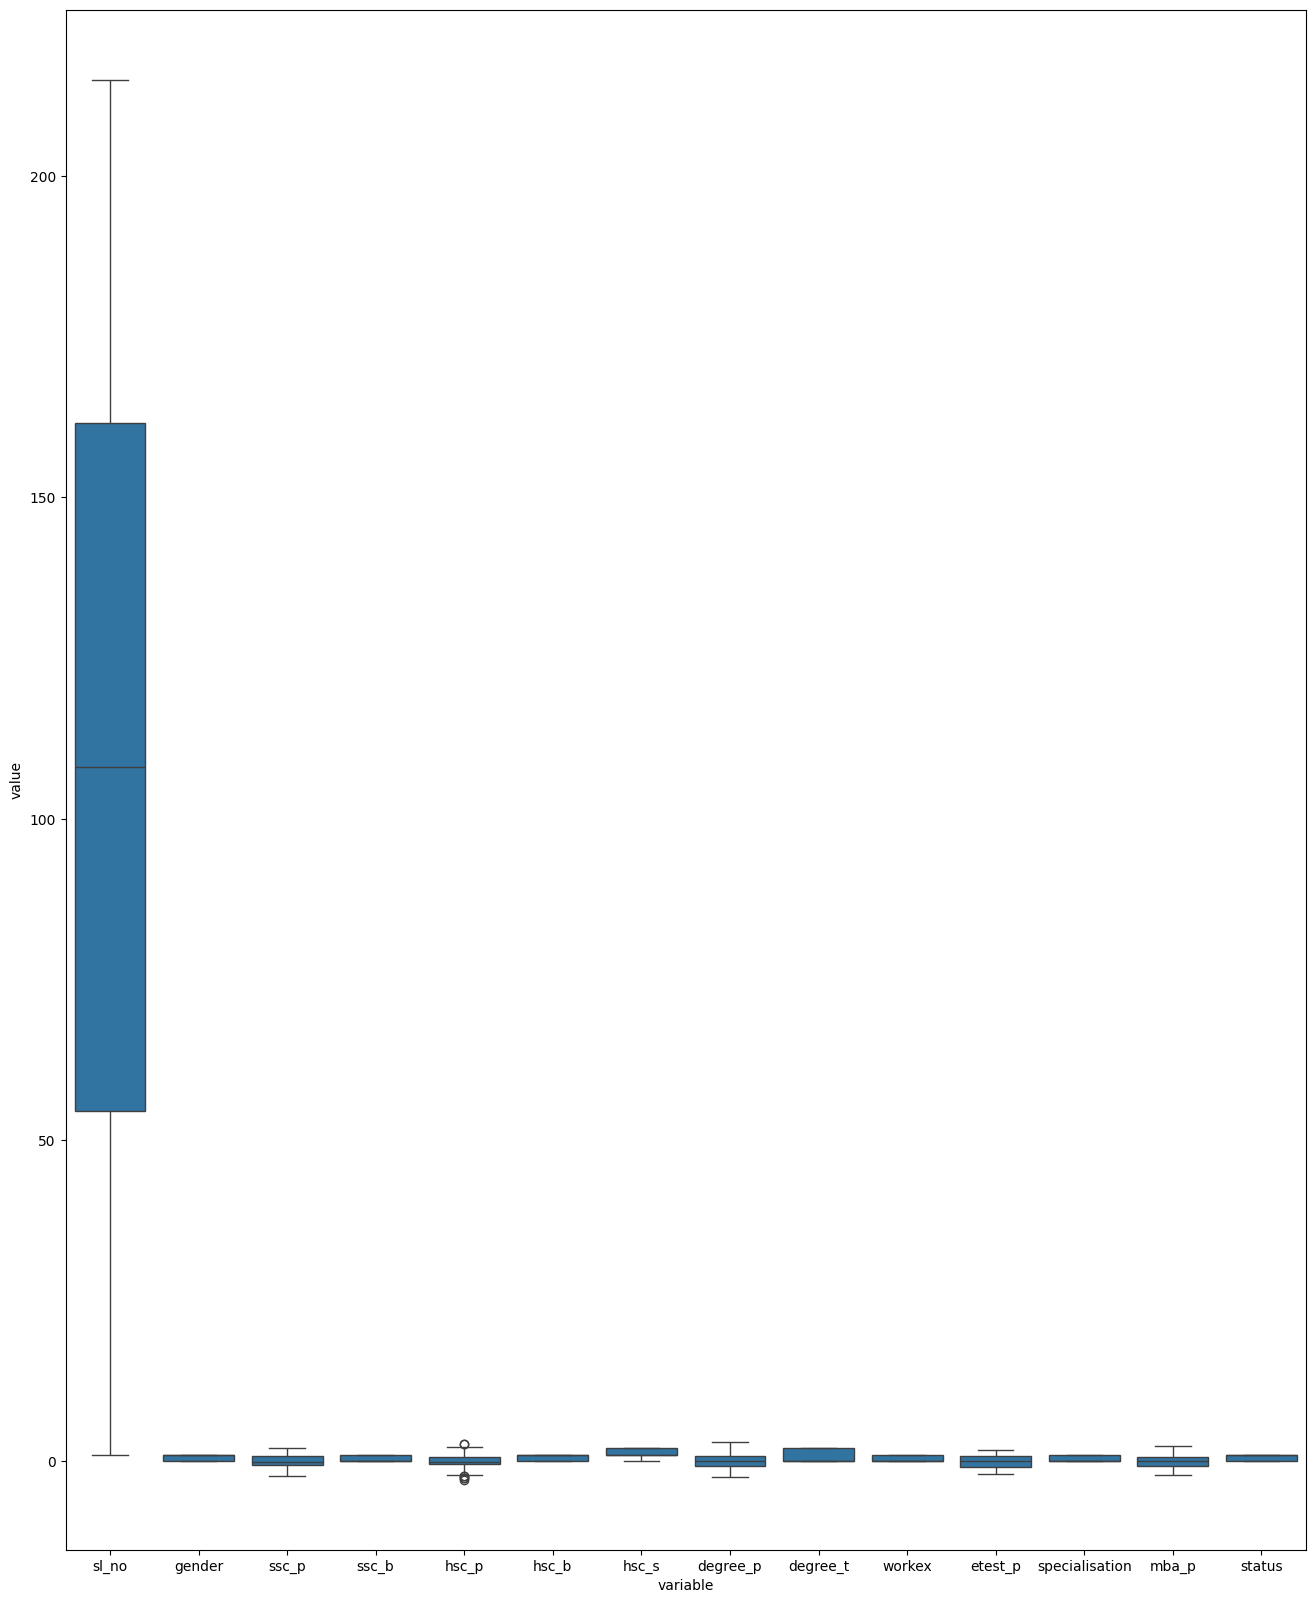

In [ ]:
cols=['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']#when compare to employee_id remaining are very small "data"
plt.figure(figsize=(16, 20))#for the previous_year_rating we are getting the not normal distribute when compared to others data
df = pd.DataFrame(data = df, columns = cols)

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

# **heatMap**

Correlation Matrix:
                   sl_no    gender     ssc_p     ssc_b     hsc_p     hsc_b  \
sl_no           1.000000  0.074306 -0.078452  0.027214 -0.082543  0.116887   
gender          0.074306  1.000000 -0.071434  0.019429 -0.021297  0.065945   
ssc_p          -0.078452 -0.071434  1.000000  0.119096  0.511450  0.069433   
ssc_b           0.027214  0.019429  0.119096  1.000000 -0.140996  0.605883   
hsc_p          -0.082543 -0.021297  0.511450 -0.140996  1.000000 -0.023124   
hsc_b           0.116887  0.065945  0.069433  0.605883 -0.023124  1.000000   
hsc_s           0.009955  0.071827  0.238464  0.050919 -0.162060  0.152227   
degree_p       -0.087377 -0.166568  0.541193  0.031406  0.445968  0.065624   
degree_t        0.025651  0.061345  0.207840  0.100863 -0.087621  0.057960   
workex          0.059151  0.085153  0.176196 -0.040744  0.144299  0.038357   
etest_p         0.063720  0.087493  0.259869 -0.019443  0.226179  0.032235   
specialisation  0.046630 -0.106160 -0.172487

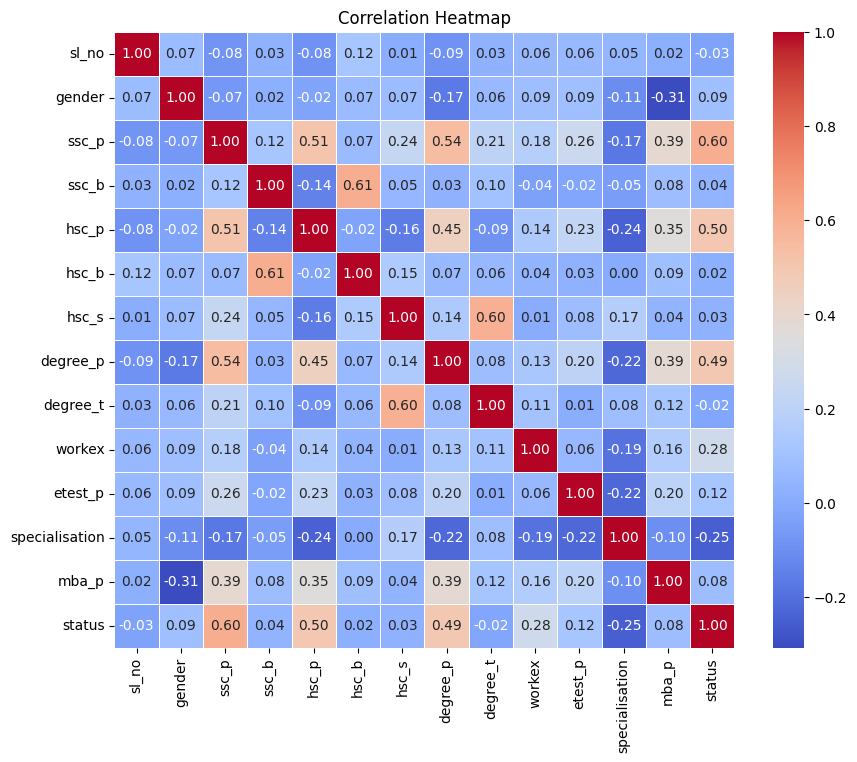

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'Employee' with numerical columns
numerical_columns = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']

# Extract numerical columns from the DataFrame
numerical_data = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# **Z-Score**

In [ ]:
import pandas as pd#for the normal distributed we have deleted the outlayers
from scipy import stats

# Define the numerical columns for outlier detection
cols_normal=['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']

# Calculate Z-Scores for each numerical variable
z_scores = pd.DataFrame()
for col in cols_normal:
    z_scores[col] = stats.zscore(df[col])

# Define the Z-Score threshold for outlier detection
z_score_threshold = 3

# Find and remove rows with outliers based on the threshold
df_new =df[(z_scores.abs() <= z_score_threshold).all(axis=1)]

# Display the cleaned dataset without outliers
print("Cleaned dataset without outliers:")
print(df_new.head())

Cleaned dataset without outliers:
   sl_no  gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       1 -0.049031      1  2.195963      1      1 -1.158230         2   
1      2       1  1.121943      0  1.098928      1      2  1.467396         2   
2      3       1 -0.234072      0  0.172464      0      0 -0.284743         0   
3      4       1 -1.048339      0 -1.333660      0      2 -2.104710         2   
4      5       1  1.755811      0  0.678617      0      1  0.951271         0   

   workex   etest_p  specialisation     mba_p  status  
0       0 -1.399135               1 -0.555854       1  
1       1  1.082552               0  0.730818       1  
2       0  0.320376               0 -0.747234       1  
3       0 -0.377919               1 -0.437858       0  
4       0  1.671035               0 -1.207551       1  


# **IQR**

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numerical_columns = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)

# Print or handle outliers
print("Number of outliers:", outliers.sum())
print("Outliers:", df[outliers])

Number of outliers: 7
Outliers:      sl_no  gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  \
24      25       1  0.848762      1  2.760976      1      2  1.633037   
42      43       1 -1.659207      1 -2.641458      0      2 -0.145396   
49      50       0 -1.573225      1 -2.851291      1      0 -2.104710   
120    121       1 -0.870090      1 -2.537507      1      2 -1.007934   
169    170       1 -0.693878      1 -2.315057      1      2 -0.675396   
177    178       0  0.514473      0  2.702393      1      1  1.649715   
206    207       1 -2.330465      0 -2.331440      0      2 -0.859598   

     degree_t  workex   etest_p  specialisation     mba_p  status  
24          2       0  1.703039               0  1.842852       1  
42          1       0 -0.635653               0 -2.150446       0  
49          1       0 -0.462292               1 -1.082620       0  
120         0       0  0.173943               1 -0.553966       0  
169         2       0 -1.453162            

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into train and test sets
X = df.drop(columns=['status'])  # Features
y = df['status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
     min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)
dt_classifier.fit(X_train, y_train)


svc_classifier = SVC(kernel='linear', random_state=42,C=1.0)
svc_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate Decision Tree classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Evaluate SVC classifier
print("\nSVC Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Decision Tree Classifier:
Accuracy: 0.813953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.90      0.84      0.87        31

    accuracy                           0.81        43
   macro avg       0.77      0.79      0.78        43
weighted avg       0.83      0.81      0.82        43

Confusion Matrix:
 [[ 9  3]
 [ 5 26]]

SVC Classifier:
Accuracy: 0.8837209302325582
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Confusion Matrix:
 [[ 9  3]
 [ 2 29]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN classifier
print("\nK-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.5813953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.17      0.18        12
           1       0.70      0.74      0.72        31

    accuracy                           0.58        43
   macro avg       0.45      0.45      0.45        43
weighted avg       0.56      0.58      0.57        43

Confusion Matrix:
 [[ 2 10]
 [ 8 23]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate Gaussian Naive Bayes classifier
print("\nGaussian Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



Gaussian Naive Bayes Classifier:
Accuracy: 0.813953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43

Confusion Matrix:
 [[ 7  5]
 [ 3 28]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_classifier.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate Logistic Regression classifier
print("\nLogistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))



Logistic Regression Classifier:
Accuracy: 0.8837209302325582
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Confusion Matrix:
 [[ 9  3]
 [ 2 29]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Classifier:
Accuracy: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.78      0.94      0.85        31

    accuracy                           0.77        43
   macro avg       0.73      0.63      0.65        43
weighted avg       0.75      0.77      0.74        43

Confusion Matrix:
 [[ 4  8]
 [ 2 29]]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the Extra Trees classifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Fit the model on the training data
et_classifier.fit(X_train, y_train)

# Predictions
y_pred_et = et_classifier.predict(X_test)

# Evaluate Extra Trees classifier
print("\nExtra Trees Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_et))
print("Classification Report:\n", classification_report(y_test, y_pred_et))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_et))



Extra Trees Classifier:
Accuracy: 0.8372093023255814
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.83      0.97      0.90        31

    accuracy                           0.84        43
   macro avg       0.85      0.73      0.76        43
weighted avg       0.84      0.84      0.82        43

Confusion Matrix:
 [[ 6  6]
 [ 1 30]]
